## Importazione di librerie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Lettura Dataset

*Viene prelevato il Dataset grezzo (non ancora pre-processato) e ne vengono stampate le prime righe, in modo da avere una prima idea della struttura del Set.*

In [2]:
# Leggi il Dataset grezzo dal folder 'data'
raw_dataset = pd.read_csv('../data/raw_dataset.csv')

# Stampa a video le prime 10 righe del Dataset
raw_dataset.head(10) 

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


**Modifica nomi categorie**

In questa cella sono stati momentaneamente migliorati i nomi delle categorie solo per una migliore leggibilità.

In [3]:
# Rimuovi "_5" dalla fine delle categorie
raw_dataset['category'] = raw_dataset['category'].str.replace(r'_5$', '', regex=True)

#### Aggiunta colonna "lenght"

Aggiunta una nuova colonna contenente, per ogni entry, il numero di caratteri contenuti nella feature "text_"

In [4]:
raw_dataset['length'] = raw_dataset['text_'].apply(len)
raw_dataset.head()

,category,rating,label,text_,length
0,Home_and_Kitchen,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75
1,Home_and_Kitchen,5.0,CG,"love it, a great upgrade from the original. I...",80
2,Home_and_Kitchen,5.0,CG,This pillow saved my back. I love the look and...,67
3,Home_and_Kitchen,1.0,CG,"Missing information on how to use it, but it i...",81
4,Home_and_Kitchen,5.0,CG,Very nice set. Good quality. We have had the s...,85


#### Info su Dataaset

In questa cella ci sono informazioni riguardo: il numero di entry, il numero di colonne, i valori non null per ogni colonna, i tipi utilizzati, e la memoria utilizzata dal Dataset.

In [5]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
 4   length    40432 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


#### Conteggio valori nulli

Per ogni colonna (feature) vengono conteggiati quanti volori nulli sono presenti nel Dataset.

In [6]:
raw_dataset.isnull().sum()

category    0
rating      0
label       0
text_       0
length      0
dtype: int64

# Caratteristiche delle features

### Distribuzione della feature Label

In questa cella viene generato un grafico, che rappresenta la distrubuzione della feature label. Viene rappresentato come il Dataset sia perfettamente bilanciato.

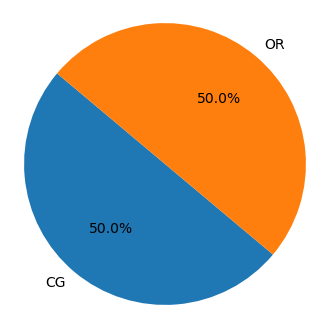

In [13]:
# Sostituisci 'category' con il nome effettivo della tua feature
feature_da_visualizzare = 'label'

# Calcola la distribuzione dei valori nella feature
conteggio_valori = raw_dataset[feature_da_visualizzare].value_counts()

# Crea il grafico a torta
plt.figure(figsize=(4, 4))  # Imposta la dimensione del grafico
plt.pie(conteggio_valori, labels=conteggio_valori.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Imposta l'asse in modo che il grafico sia circolare

# Mostra il grafico
plt.show()

## Distribuzione della feature rating

In questa cella viene generato un grafico, che rappresenta la distrubuzione dei valori della feature "rating" presenti per ogni entry nel Dataset.

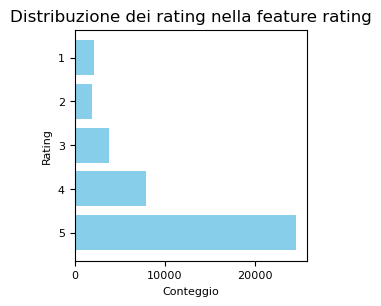

In [14]:
# Sostituisci 'rating' con il nome effettivo della tua feature
feature_da_visualizzare = 'rating'

# Calcola la distribuzione dei valori nella feature
conteggio_valori = raw_dataset[feature_da_visualizzare].value_counts()

# Crea il grafico a barre orizzontali
plt.figure(figsize=(3, 3))  # Ajusta le dimensioni del grafico come necessario
plt.barh(conteggio_valori.index, conteggio_valori, color='skyblue')
plt.xlabel('Conteggio', fontsize=8)  # Riduzione della dimensione del testo per gli assi
plt.ylabel('Rating', fontsize=8)  # Riduzione della dimensione del testo per gli assi
plt.title(f'Distribuzione dei rating nella feature {feature_da_visualizzare}', fontsize=12)  # Riduzione della dimensione del testo per il titolo
plt.xticks(fontsize=8)  # Riduzione della dimensione del testo per le etichette dell'asse X
plt.yticks(fontsize=8)  # Riduzione della dimensione del testo per le etichette dell'asse Y
plt.gca().invert_yaxis()  # Inverte l'asse Y per mostrare la barra più lunga in alto

# Mostra il grafico
plt.show()

## Distribuzione della feature category

In questa cella viene generato un grafico, che rappresenta la distrubuzione dei valori della feature "category" presenti per ogni entry nel Dataset.

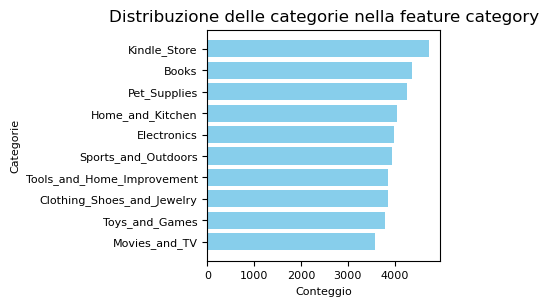

In [15]:
# Sostituisci 'category' con il nome effettivo della tua feature
feature_da_visualizzare = 'category'

# Calcola la distribuzione dei valori nella feature "category"
conteggio_categorie = raw_dataset[feature_da_visualizzare].value_counts()

# Crea il grafico a barre orizzontali
plt.figure(figsize=(3, 3))  # Ajusta le dimensioni del grafico come necessario
plt.barh(conteggio_categorie.index, conteggio_categorie, color='skyblue')
plt.xlabel('Conteggio', fontsize=8)  # Riduzione della dimensione del testo per gli assi
plt.ylabel('Categorie', fontsize=8)  # Riduzione della dimensione del testo per gli assi
plt.title(f'Distribuzione delle categorie nella feature {feature_da_visualizzare}', fontsize=12)  # Riduzione della dimensione del testo per il titolo
plt.xticks(fontsize=8)  # Riduzione della dimensione del testo per le etichette dell'asse X
plt.yticks(fontsize=8)  # Riduzione della dimensione del testo per le etichette dell'asse Y
plt.gca().invert_yaxis()  # Inverte l'asse Y per mostrare la barra più lunga in alto

# Mostra il grafico
plt.show()

## Caratteristiche della feature "Label"

Nelle seguenti celle sono descritte caratteristiche testuali della colonna "Label"

Nella prossima cella viene descritta, mediante un grafico, la distrubuzione della lunghezza della feature "label"

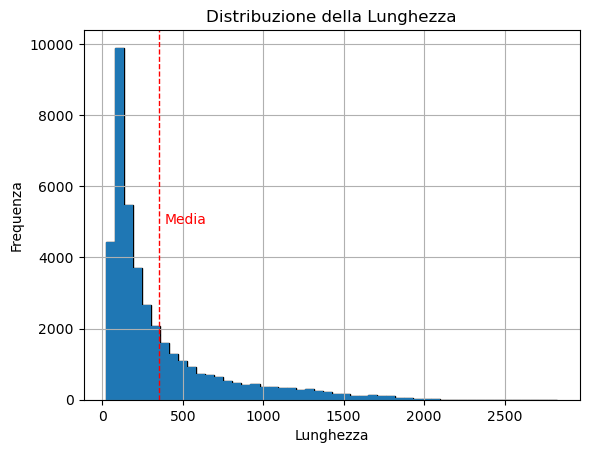

In [16]:
plt.hist(raw_dataset['length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuzione della Lunghezza')
plt.xlabel('Lunghezza')
plt.ylabel('Frequenza')
plt.grid(True)
plt.axvline(raw_dataset['length'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(raw_dataset['length'].mean()*1.1, max(plt.hist(raw_dataset['length'], bins=50)[0])/2, 'Media', color = 'red')
plt.show()


#### Descrizione lunghezza

Queste due celle producono statistiche descrittive (come conteggio, media, deviazione standard, minimo, massimo, e i quartili) per ogni gruppo basato sui diversi valori di 'label'.

In [11]:
raw_dataset.length.describe()

count    40432.000000
mean       351.271963
std        369.813570
min         24.000000
25%        107.000000
50%        198.000000
75%        439.000000
max       2827.000000
Name: length, dtype: float64

In [12]:
raw_dataset.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                  
             mean         std   min    25%    50%    75%     max  
label                                                             
CG     305.573506  307.037430  24.0   96.0  174.0  383.0  1717.0  
OR     396.970419  418.428047  28.0  121.0  224.0  498.0  2827.0